###Tugas 1

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [15]:
import pandas as pd

df = pd.read_csv('voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


Encode Label

In [16]:
encoder = OneHotEncoder()
encoder.fit(df[['label']])
encoded_labels = encoder.transform(df[['label']]).toarray()
df_encoded = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['label']))
df = pd.concat([df, df_encoded], axis=1)
df.drop('label', axis=1, inplace=True)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label_female,label_male
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,0.0,1.0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,0.0,1.0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,0.0,1.0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,0.0,1.0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,0.0,1.0


Standarisasi Fitur

In [17]:
X = df.drop('label_male', axis=1)
y = df['label_male']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Fungsi evaluasi model

In [19]:
def evaluate_svm(X_train, X_test, y_train, y_test, kernel):
  model = SVC(kernel=kernel)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  return accuracy

Split data

In [20]:
# 70:30
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 80:20
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Evaluasi model untuk masing-masing kernel dan rasio split

In [21]:
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
  acc_70_30 = evaluate_svm(X_train1, X_test1, y_train1, y_test1, kernel)
  acc_80_20 = evaluate_svm(X_train2, X_test2, y_train2, y_test2, kernel)
  results.append({
      'Kernel': kernel,
      'Akurasi 70:30': acc_70_30,
      'Akurasi 80:20': acc_80_20
  })

hasil = pd.DataFrame(results)
print(hasil)

   Kernel  Akurasi 70:30  Akurasi 80:20
0  linear       1.000000       1.000000
1    poly       0.995794       0.998423
2     rbf       1.000000       1.000000


###Tugas 2

In [48]:
from pathlib import Path
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

####Load data & preprocessing

In [41]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [42]:
test_dir = '/content/drive/MyDrive/images/test/'
train_dir = '/content/drive/MyDrive/images/training/'

In [43]:
train_img = load_dataset(train_dir)

In [32]:
def standarized_input(image):
  std_img = cv2.resize(image, (1100, 600))

  return std_img

In [44]:
def label_encoder(label):
  num_val = 0

  if (label == 'day'):
    num_val = 1

  return num_val

In [45]:
def preprocess(img_list):
  std_img_list = []

  for item in img_list:
    image = item[0]
    label = item[1]

    std_img = standarized_input(image)

    img_label = label_encoder(label)

    std_img_list.append((std_img, img_label))

  return std_img_list

In [46]:
train_std_img_list = preprocess(train_img)

####Split data 80:20

In [49]:
train_data, test_data = train_test_split(train_std_img_list, test_size=0.2, random_state=42)

####Histogram RGB

In [50]:
def color_hist(image, bins=32):
  hist_r = cv2.calcHist([image], [0], None, [bins], [0, 256])
  hist_g = cv2.calcHist([image], [1], None, [bins], [0, 256])
  hist_b = cv2.calcHist([image], [2], None, [bins], [0, 256])

  hist_r = cv2.normalize(hist_r, hist_r).flatten()
  hist_g = cv2.normalize(hist_g, hist_g).flatten()
  hist_b = cv2.normalize(hist_b, hist_b).flatten()

  hist_features = np.hstack([hist_r, hist_g, hist_b])

  return hist_features

####Ekstraksi Fitur

In [51]:
def extract_features(dataset):
  features = []
  labels = []

  for img, label in dataset:
    feat = color_hist(img)
    features.append(feat)
    labels.append(label)

  return np.array(features), np.array(labels)

X_train, y_train = extract_features(train_data)
X_test, y_test = extract_features(test_data)

####Model SVM dengan kernal RBF

In [53]:
rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf.fit(X_train, y_train)

y_pred = rbf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 1.0


####Hyperparameter tuning (eksperimen gamma & C)

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.001, 0.0001]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-validation Accuracy:", grid.best_score_)

best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
final_acc = accuracy_score(y_test, y_pred_best)
print(f"Akurasi terbaik di data test: {final_acc:.4f}")

Best Parameters: {'C': 1, 'gamma': 'scale'}
Best Cross-validation Accuracy: 1.0
Akurasi terbaik di data test: 1.0000


####Visualisasi dengan RBF

Index Gambar   : 47
Label Asli     : Day
Label Prediksi : Day


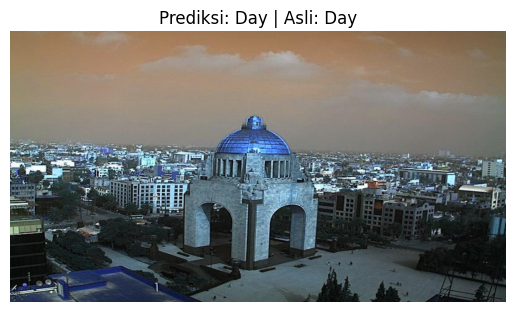

In [57]:
rand_index = np.random.randint(0, len(test_data))
test_img, true_label = test_data[rand_index]

test_feat = color_hist(test_img).reshape(1, -1)

pred_label = rbf.predict(test_feat)[0]

print(f"Index Gambar   : {rand_index}")
print(f"Label Asli     : {'Day' if true_label == 1 else 'Night'}")
print(f"Label Prediksi : {'Day' if pred_label == 1 else 'Night'}")

plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediksi: {'Day' if pred_label==1 else 'Night'} | Asli: {'Day' if true_label==1 else 'Night'}")
plt.axis('off')
plt.show()


####Visualisasi dengan hyperparameter tuning

Index Gambar   : 36
Label Asli     : Night
Label Prediksi : Night


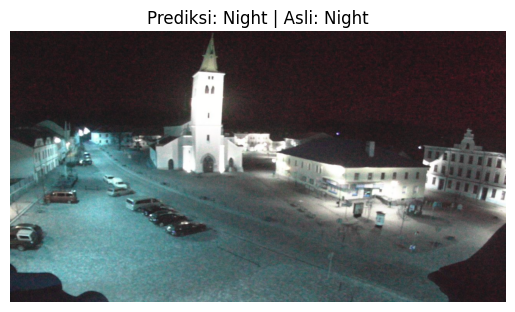

In [58]:
rand_index = np.random.randint(0, len(test_data))
test_img, true_label = test_data[rand_index]

test_feat = color_hist(test_img).reshape(1, -1)

pred_label = best_model.predict(test_feat)[0]

print(f"Index Gambar   : {rand_index}")
print(f"Label Asli     : {'Day' if true_label == 1 else 'Night'}")
print(f"Label Prediksi : {'Day' if pred_label == 1 else 'Night'}")

plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.title(f"Prediksi: {'Day' if pred_label==1 else 'Night'} | Asli: {'Day' if true_label==1 else 'Night'}")
plt.axis('off')
plt.show()
